In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
book_df = pd.read_csv('../static/data/Books.csv')
rating_df = pd.read_csv('../static/data/Ratings.csv')
user_df = pd.read_csv('../static/data/Users.csv')

## Users

In [3]:
print(f'The shape of Users dataset:\n\t\t\tColumns: {user_df.shape[1]}\n\t\t\tRows:\t {user_df.shape[0]}\n')
print('The number of unique Users in Rating dataset is:', user_df['User-ID'].nunique())

The shape of Users dataset:
			Columns: 3
			Rows:	 278858

The number of unique Users in Rating dataset is: 278858


In [4]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


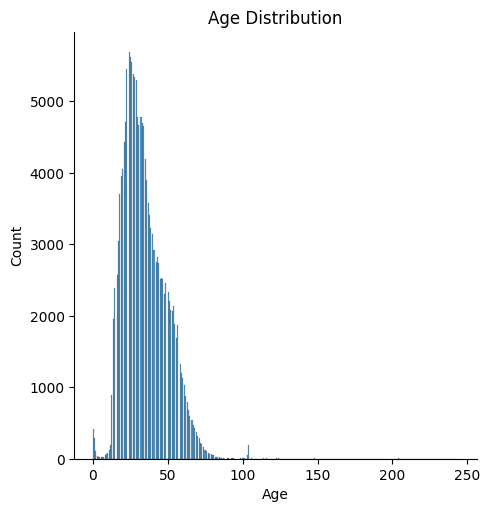

In [5]:
sns.displot(user_df.Age);
plt.title('Age Distribution');

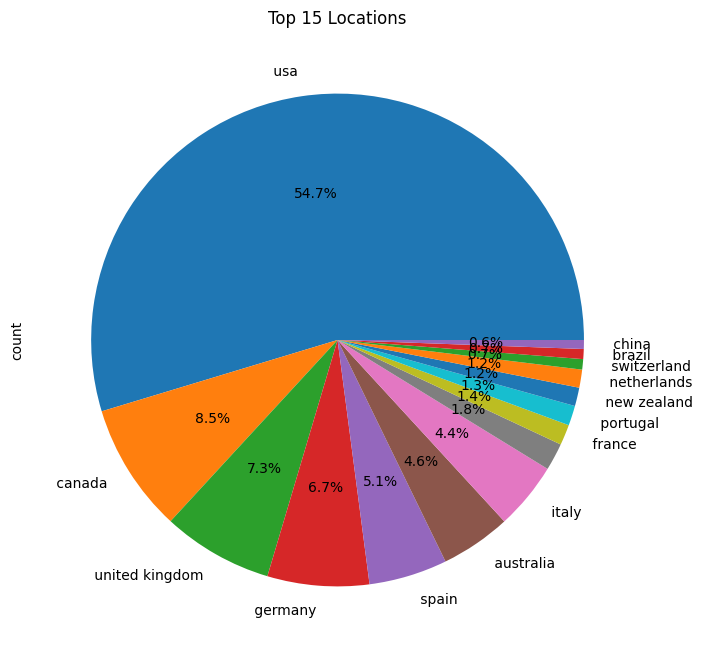

In [6]:
Location = user_df.Location.str.split(',').str[-1]

plt.figure(figsize=(12, 8))
Location.value_counts()[:15].plot(
    kind='pie',
    title = 'Top 15 Locations',
    autopct = '%1.1f%%',
)
plt.show();

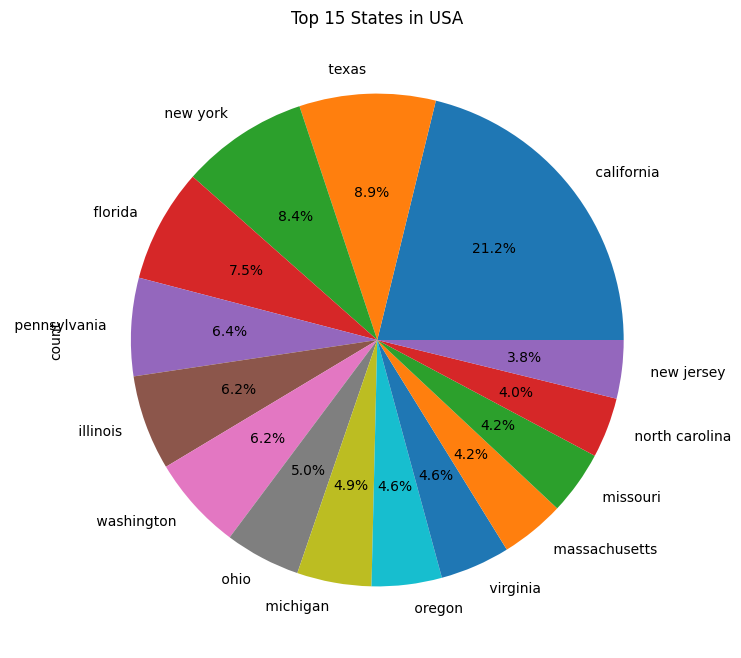

In [7]:
Location = user_df[user_df['Location'].str.contains('usa', case=False)]['Location']
state = Location.str.split(',').str[1]

plt.figure(figsize=(12, 8))
state.value_counts()[:15].plot(
    kind='pie',
    title = 'Top 15 States in USA',
    autopct = '%1.1f%%',
)
plt.show();

## Books

In [8]:
print(f'The shape of Books dataset:\n\t\t\tColumns: {book_df.shape[1]}\n\t\t\tRows:\t {book_df.shape[0]}\n')
print('The number of unique Books in Rating dataset is:', book_df.ISBN.nunique())

The shape of Books dataset:
			Columns: 8
			Rows:	 271360

The number of unique Books in Rating dataset is: 271360


In [9]:
book_df.sample(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
59526,0449002470,The Pirate Prince,Gaelen Foley,1998,Ivy Books,http://images.amazon.com/images/P/0449002470.0...,http://images.amazon.com/images/P/0449002470.0...,http://images.amazon.com/images/P/0449002470.0...
3905,0755310047,Josephine Cox,Piers Dudgeon,2001,Headline,http://images.amazon.com/images/P/0755310047.0...,http://images.amazon.com/images/P/0755310047.0...,http://images.amazon.com/images/P/0755310047.0...
15569,0689711522,Silver on the Tree,Susan Cooper,1987,Simon Pulse,http://images.amazon.com/images/P/0689711522.0...,http://images.amazon.com/images/P/0689711522.0...,http://images.amazon.com/images/P/0689711522.0...
71305,2892272041,First Day of School (True Adventures of Chuck ...,Kiki,1988,Montbec,http://images.amazon.com/images/P/2892272041.0...,http://images.amazon.com/images/P/2892272041.0...,http://images.amazon.com/images/P/2892272041.0...
67973,0060582553,Burglars Can't Be Choosers,Lawrence Block,2004,HarperTorch,http://images.amazon.com/images/P/0060582553.0...,http://images.amazon.com/images/P/0060582553.0...,http://images.amazon.com/images/P/0060582553.0...


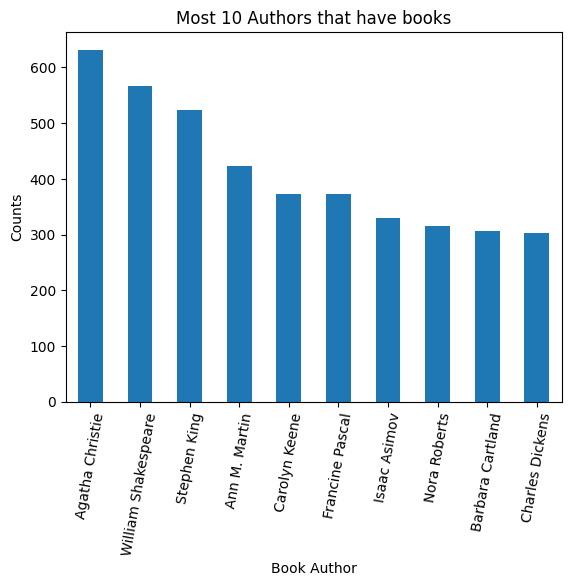

In [10]:
book_df['Book-Author'].value_counts()[:10].plot(
    kind='bar', 
    rot=80, 
    xlabel='Book Author',
    ylabel='Counts', 
    title='Most 10 Authors that have books');

It's not logical that some Authors have more that 500 books to sell.

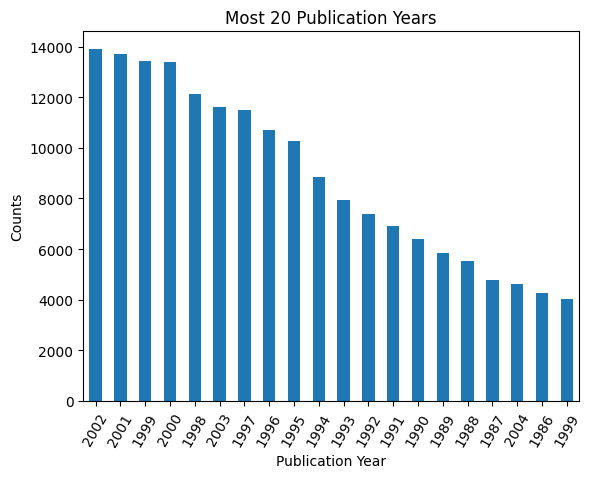

In [11]:
book_df['Year-Of-Publication'].value_counts()[:20].plot(
    kind='bar', 
    rot=60, 
    xlabel='Publication Year',
    ylabel='Counts', 
    title='Most 20 Publication Years');

The most of books are back in 90s.

## Ratings

In [12]:
rating_df.sample(5)

,User-ID,ISBN,Book-Rating
592366,142823,1879402297,0
129092,29916,0385492081,0
789191,190923,0425161242,0
259587,60244,0140232540,8
1034907,247278,0425162397,8


In [13]:
print(f'The shape of Ratings dataset:\n\t\t\tColumns: {rating_df.shape[1]}\n\t\t\tRows:\t {rating_df.shape[0]}\n')
print('The number of unique Users in Rating dataset is:', rating_df['User-ID'].nunique())
print('The number of unique Books in Rating dataset is:', rating_df.ISBN.nunique())

The shape of Ratings dataset:
			Columns: 3
			Rows:	 1149780

The number of unique Users in Rating dataset is: 105283
The number of unique Books in Rating dataset is: 340556


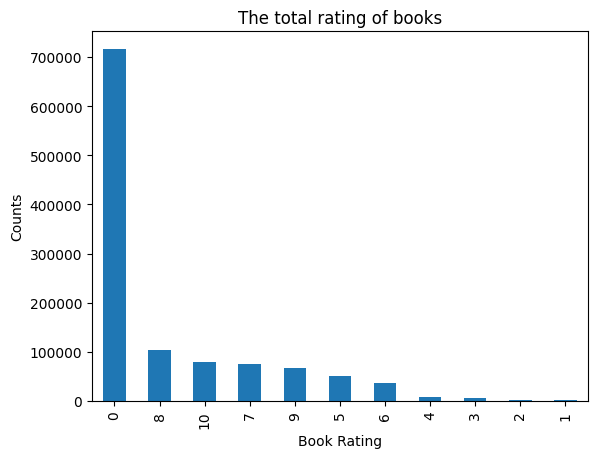

In [14]:
rating_df['Book-Rating'].value_counts().plot(
    kind='bar', 
    xlabel='Book Rating', 
    ylabel='Counts', 
    title='The total rating of books');